<a href="https://colab.research.google.com/github/Sahil-Singh2002/Modelling-with-Differential-Equations/blob/main/Plotting_direction_fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

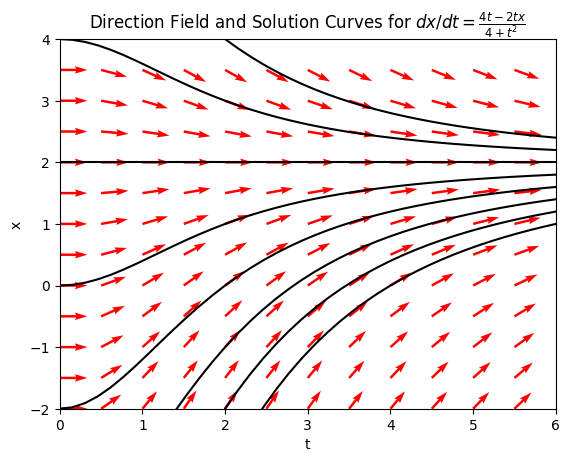

-------------------------------------------
The solution to the directional field is


Eq(x(t), (C1 + 2*t**2)/(t**2 + 4))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Function, symbols, diff, Eq, dsolve
from scipy.integrate import odeint

def f(t,x):
    return (4*t - 2*t*x)/(4 + t**2)

tmin = 0
tmax = 6
tstep = .5
xmin = -2
xmax = 4
xstep = .5
T, X = np.meshgrid(np.arange(tmin, tmax, tstep), np.arange(xmin, xmax, xstep))

U = np.ones(T.shape) / np.sqrt(1 + f(T, X)**2)
V = f(T,X) / np.sqrt(1 + f(T, X)**2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.title.set_text(r'Direction Field and Solution Curves for $dx/dt =\frac{4t - 2tx}{4+t^2}$')
Q = plt.quiver(T, X, U, V, angles='xy', scale_units='xy', scale=3,  color='red')

for k in range(-4, 4):
    x0 = 2*k
    t = np.linspace(0,6,40)
    def dxdt(x,t):
        return f(t,x)
    y = odeint(dxdt,x0,t)

    ax.plot(t,y, color='black')

ax.set_xlim(tmin,tmax)
ax.set_ylim(xmin,xmax)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

t = symbols('t')
x = Function('x')(t)  # Use 'y' instead of 'x'

# Define the differential equation
deq = Eq(diff(x, t) - (4 * t - 2 * t * x) / (4 + t**2), 0)

# Solve the differential equation
xsoln = dsolve(deq, x)
print("-------------------------------------------")
print(f"The solution to the directional field is")
xsoln